<a href="https://colab.research.google.com/github/kani91/ProgrammingAssignment2/blob/master/2_hypothesis_function_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Decision Function lab

### Introduction

In this lesson, we'll explore the decision function in logistic regression.  As we saw, the decision function outputs a score where positive values indicate a prediction of the event occurring and negative values predict the event did not occur for an observation.  Let's get started.  

### Loading our Data

Let's start by loading our data.  The dataset is used to predict the presence or absence of heart disease and is [available here](https://www.kaggle.com/ronitf/heart-disease-uci).

In [0]:
import pandas as pd
url = "https://raw.githubusercontent.com/jigsawlabs-student/logistic-regression/master/0-classification-fundamentals/2-logistic-regression/heart.csv"
df = pd.read_csv(url)

In [0]:
df[:2]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


For this lesson, we'll only use a subset of these values.

In [0]:
selected_cols = ['ca', 'oldpeak', 'target']
df_scoped = df[selected_cols]

The target indicates the presence or absence of heart disease, and ca and oldpeak are features describing the following:

* ca: `number of major vessels (0-3) colored by flourosopy`
* oldpeak: `oldpeak = ST depression induced by exercise relative to rest`

Let's start by looking at the number of different values in the target.  Use `value_counts()` to do so.

In [0]:


# 1    165
# 0    138
# Name: target, dtype: int64

1    165
0    138
Name: target, dtype: int64

### Exploring our Data

Let's continue with exploring the data in `df_scoped`.

In [0]:
df_scoped[:3]

,ca,oldpeak,target
0,0,2.3,1
1,0,3.5,1
2,0,1.4,1


We'll explore our data by creating a plot of the positive and negative events, and the values of the corresponding features.  Begin by selecting all of the observations from df_scoped where heart disease was present.  Assign it to `df_scoped_heart_d`.  Assign the observations where heart disease was absent to `df_scoped_benign`.

In [0]:
df_scoped_heart_d = None
df_scoped_benign = None

In [0]:
df_scoped_heart_d.shape, df_scoped_benign.shape
# ((165, 3), (138, 3))

((165, 3), (138, 3))

In [0]:
df_scoped_heart_d[:2]

# 	ca	oldpeak	target
# 0	0	2.3	1
# 1	0	3.5	1

,ca,oldpeak,target
0,0,2.3,1
1,0,3.5,1


From here create a scatter trace for data where there was heart disease.  And another scatter trace for the subset of data where there wasn't heart disease.  For each trace, plot the `ca` values on the x axis and the `oldpeak` values on the y axis.

> Replace the dictionaries with scatter traces.

In [0]:
import plotly.graph_objects as go
scatter_benign = go.Scatter()
scatter_heart_d = go.Scatter()

In [0]:
fig = go.Figure(data = [scatter_benign, scatter_heart_d], 
          layout =  {'xaxis': {'title': 'resting cardiographic results'},
                     'yaxis': {'title': 'old peak'}
                    })

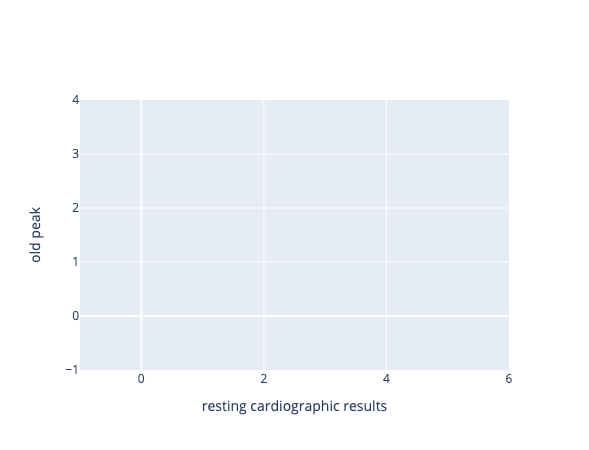

In [0]:
fig

<img src="https://github.com/jigsawlabs-student/logistic-regression/blob/master/0-classification-fundamentals/2-logistic-regression/heart-disease-data.png?raw=1" width="60%">

From the chart above we can begin to see a trend.  It appears that observations in the in the bottom left are more likely to show heart disease, where both "old peak" and "resting ca" is lower.

### Training a model

Now let's train a logistic regression model.   Separate the data from `df_scoped` into the targets and features accordingly.

In [0]:
X = None
y = None

In [0]:
X.shape, y.shape

# ((303, 2), (303,))

Next split the data into training and test set.  Use a random_state of 1, and a test_size of .2.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state = 1,
                                                    test_size = .2)

In [0]:
X_train.shape, X_test.shape
# ((242, 2), (61, 2))

((242, 2), (61, 2))

Next load up the logistic regression model, train it on the training set, and score it on the test.

In [0]:


model = None

# 0.7213114754098361

0.7213114754098361

### Working with the hypothesis function

Now let's look at the parameters for the logistic regression model.

In [0]:
model.coef_, model.intercept_

(array([[-0.79930296, -0.89582382]]), array([1.69547294]))

Turn the parameters from our trained model above into a decision function score.  Our function takes in a features for a single observation and returns a value between positive and negative infinity.

In [0]:
def decision_function_score(ca, oldpeak):
    pass

In [0]:
decision_function_score(3,6.2 )
# -6.256543624000001

-6.256543624000001

Now let's see the scores for each of the observations.  We'll select lists of data for the two features.

In [0]:
test_ca = X_test['ca'].values
test_peak = X_test['oldpeak'].values

Iterate through the `test_ca` and `test_peak` data to produce a list of scores for the test data.

In [0]:
scores = None

In [0]:
scores[:3]
# [-6.256543624000001, 1.69547294, 0.09686701999999991]

[-6.256543624000001, 1.69547294, 0.09686701999999991]

Now let's see how they line up to the scores returned from our model's `decision_function` function.

In [0]:
model.decision_function(X_test)[:3]
# array([-6.25654362,  1.69547294,  0.09686702])

array([-6.25654362,  1.69547294,  0.09686702])

And how do these line up with our observed test data?

In [0]:
y_test[:3]

204    0
159    1
219    0
Name: target, dtype: int64

Let's make our decision function more explicit.  Write a function called `predict` that turns the scores into "hard labels" of 1 or 0.

In [0]:
def predict(score):
    pass

In [0]:
hard_labels = [predict(score) for score in scores]
hard_labels[:4]

[0, 1, 1, 0]

Notice that this is the same result that we get from the model's predict function.

In [0]:
model.predict(X_test)[:4]

array([0, 1, 1, 0])

### Summary

In this lesson we explored the hypothesis function for a logistic regression function.  We saw that we can write out the decision function by using our parameters from our trained model.  And that we can get the corresponding predictions by turning each negative score into a prediction of 0 and a positive score into a prediction of 1.  

We also saw that we can use the `model.decision_function` method to return the score and `model.predict` to return the 1 or 0 value.

### Resources

[Kaggle Heart Disease](https://www.kaggle.com/ronitf/heart-disease-uci)